In [3]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # zawsze włączają mi się errory, prawdopodobnie jest problem z pobraną biblioteką

# Zadanie 1
##### 1.1 Algorytm o złożoności $O(n^2)$

In [2]:
polynom = random.sample(range(-100, 100), 100)  # tablica współczynników od a_0 do a_n
print(polynom)

[-86, 84, 40, -49, -20, -19, -72, -16, -38, 65, -98, 16, 71, 47, -88, -33, -34, -85, 97, 53, -81, 15, -55, -50, 37, -1, 9, 76, -69, -91, 13, -64, -30, 7, -9, 51, -14, -13, -48, 21, 73, -62, 26, -96, -28, -10, 58, 20, -65, 56, 63, 61, 52, -54, 25, 92, 54, 62, -79, 0, 31, -3, -21, -59, 3, -68, -76, 49, 86, -58, 94, 39, -24, 69, -63, 32, 70, -27, 85, 23, -92, -67, -2, 18, 68, 60, -82, -77, 74, -42, 8, -80, -73, -39, 90, 72, 45, -100, 87, 99]


In [3]:
def polynomialValue1(polynomial, x):
    value = 0
    for i in range(len(polynomial)):
        y = 1
        for j in range(i):
            y *= x                      # obliczamy x do potęgi i
        value += polynomial[i] * y
    return value


print(polynomialValue1([1, 1, 1, 1, 1, 1, 1], 2))   # tutaj sprawdzamy, czy algorytm poprawnie działa
print(polynomialValue1(polynom, 0.1))   # tu testujemy, czy algorytm działa dla większych tablic

127
[-86, 84, 40, -49, -20, -19, -72, -16, -38, 65, -98, 16, 71, 47, -88, -33, -34, -85, 97, 53, -81, 15, -55, -50, 37, -1, 9, 76, -69, -91, 13, -64, -30, 7, -9, 51, -14, -13, -48, 21, 73, -62, 26, -96, -28, -10, 58, 20, -65, 56, 63, 61, 52, -54, 25, 92, 54, 62, -79, 0, 31, -3, -21, -59, 3, -68, -76, 49, 86, -58, 94, 39, -24, 69, -63, 32, 70, -27, 85, 23, -92, -67, -2, 18, 68, 60, -82, -77, 74, -42, 8, -80, -73, -39, 90, 72, 45, -100, 87, 99]
-77.25126392456522


##### 1.2 Algorytm o złożoności $O(nlogn)$

In [4]:
def fastExponentianation(x, power):
    y = x                               
    potega = 1                          
    while power > 0:                    # operację wykonujemy do czasu aż x będzie potęgowany do 0
        if power % 2 == 1:              # jeśli potęga jest nieparzysta to wymnażamy przez y
                potega *= y
        power //= 2                     # dzielimy całkowicie potęgę przez 2
        y *= y                          # podnosimy y do kwadratu
    return potega


def polynomialValue2(polynomial, x):
    wynik = 0
    for i in range(len(polynomial)):
        wynik += polynomial[i] * fastExponentianation(x, i)     # tutaj używamy szybkiego potęgowania do policzenia x do i
    return wynik

print(polynomialValue2([1, 1, 1, 1, 1, 1, 1], 2))
print(polynomialValue2(polynom, 0.1))

127
[-86, 84, 40, -49, -20, -19, -72, -16, -38, 65, -98, 16, 71, 47, -88, -33, -34, -85, 97, 53, -81, 15, -55, -50, 37, -1, 9, 76, -69, -91, 13, -64, -30, 7, -9, 51, -14, -13, -48, 21, 73, -62, 26, -96, -28, -10, 58, 20, -65, 56, 63, 61, 52, -54, 25, 92, 54, 62, -79, 0, 31, -3, -21, -59, 3, -68, -76, 49, 86, -58, 94, 39, -24, 69, -63, 32, 70, -27, 85, 23, -92, -67, -2, 18, 68, 60, -82, -77, 74, -42, 8, -80, -73, -39, 90, 72, 45, -100, 87, 99]
-77.25126392456522


##### 1.3 Algorytm o złożoności $O(n)$ - schemat Hornera

In [5]:
# To nie było wymagane, ale żeby wytłumaczyć dlaczego taka a nie inna złożoność obliczeniowa zapisałam to w kodzie.

def polynomialValue3(polynomial, x):
    wynik = 0
    for i in range(len(polynomial)):
        wynik *= x                                      # dla pierwszego przejścia mnożymy razy 0
        wynik += polynomial[len(polynomial) - i - 1]    # dodajemy współczynniki od końca tablicy
    return wynik

print(polynomialValue3(polynom, 0.1))

-77.25126392456522


Funkcja wykonuje dwie operacje - jedno mnożenie i jedno dzielenie. Każdą z tych operacji wykonuje n-razy (tyle iteracji ma pętla), więc łączna ilość operacji to 2n, stąd złożoność schematu Hornera to O(n).

# Zadanie 2

In [6]:
def example1(S):
    """Return the sum of the elements in sequence S."""
    number_of_operations = 0
    n = len(S)
    total = 0
    for j in range(n):
        total += S[j]
        number_of_operations += 1
    return number_of_operations


def example2(S):
    """Return the sum of the elements with even index in sequence S.
    """
    number_of_operations = 0
    n = len(S)
    total = 0
    for j in range(0, n, 2):
        total += S[j]
        number_of_operations += 1
    return number_of_operations


def example3(S):
    """Return the sum of the prex sums of sequence S."""
    number_of_operations = 0
    n = len(S)
    total = 0
    for j in range(n):
        for k in range(1+j):
            number_of_operations += 1
            total += S[k]
    return number_of_operations


def example4(A, B): # assume that A and B have equal length
    """Return the number of elements in B equal to the sum of prex
    sums in A."""
    number_of_operations = 0
    n = len(A)
    count = 0
    for i in range(n):
        total = 0
        for j in range(n):
            for k in range(1+j):
                total += A[k]
                number_of_operations += 1
        if B[i] == total:
            count += 1
            number_of_operations += 1
    return number_of_operations

10
9
8
7
6
5
4
3
2
1


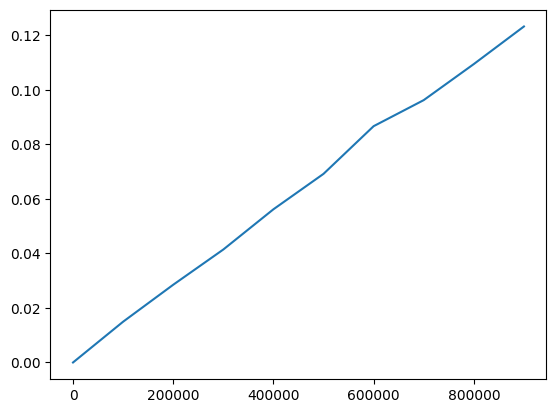

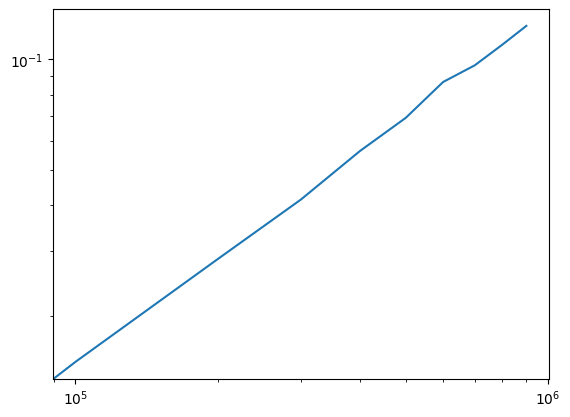

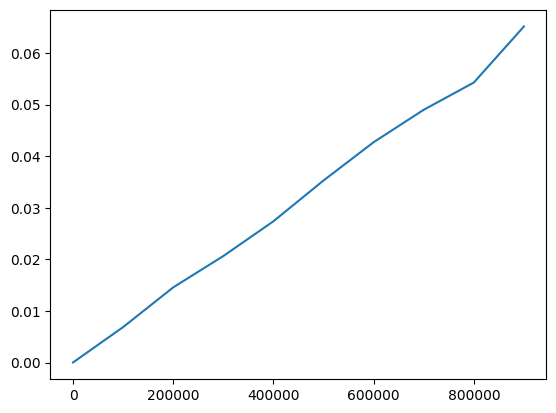

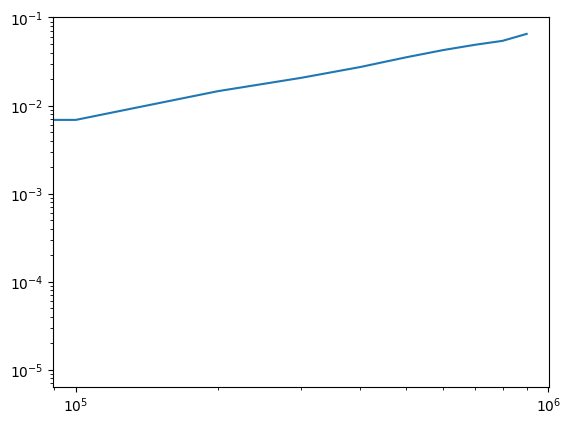

10
9
8
7
6
5
4
3
2
1


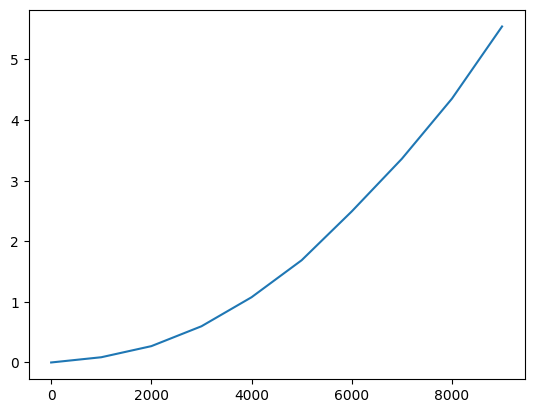

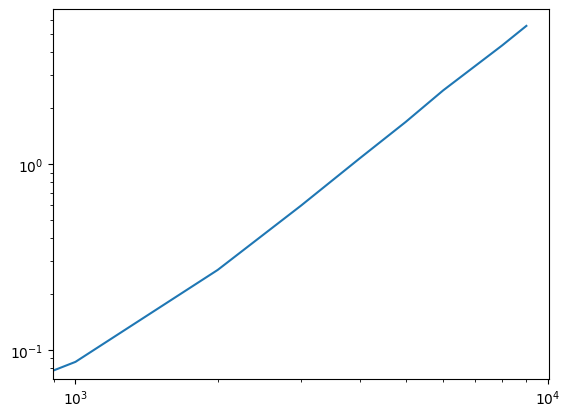

10
9
8
7
6
5
4
3
2
1


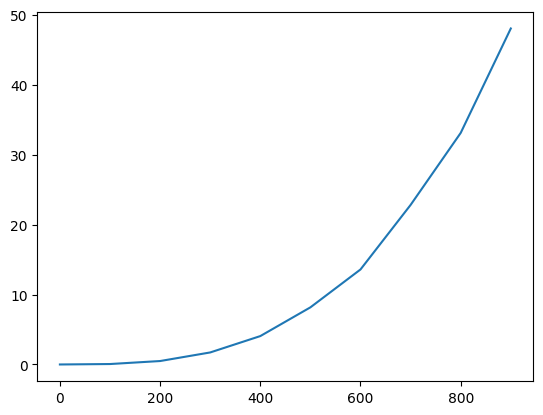

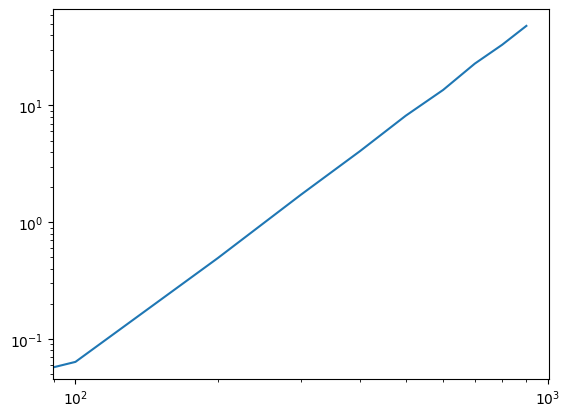

In [26]:
def czasWykonania(function, s):
    czasSredni = 0
    for i in range(100):
        S = [random.randint(-10, 10) for _ in range(s)]
        start = time.time()
        function(S)
        end = time.time()
        czasSredni += end - start
    return czasSredni / 100


def czasWykonania2(function, a):                            # czas średni dla złożoności n^3
    czasSredni = 0
    for i in range(10):
        A = [random.randint(-10, 10) for _ in range(a)]
        B = [random.randint(-10, 10) for _ in range(a)]
        start = time.time()
        function(A, B)
        end = time.time()
        czasSredni += end - start
    return czasSredni / 10

number_of_tests = 10
time_of_operations_1 = []
time_of_operations_2 = []
time_of_operations_3 = []
time_of_operations_4 = []

# funkcje o złożoności O(n)

dlugTablic = 10**5

for i in range(number_of_tests):
    time_of_operations_1.append(czasWykonania(example1, i*dlugTablic))
    time_of_operations_2.append(czasWykonania(example2, i*dlugTablic))
    print(number_of_tests-i)

plt.plot([_*dlugTablic for _ in range(number_of_tests)], time_of_operations_1)
plt.show()
plt.loglog([_*dlugTablic for _ in range(number_of_tests)], time_of_operations_1)
plt.show()

plt.plot([_*dlugTablic for _ in range(number_of_tests)], time_of_operations_2)
plt.show()
plt.loglog([_*dlugTablic for _ in range(number_of_tests)], time_of_operations_2)
plt.show()

# funkcja o złożoności O(n^2)

dlugTablic = 10**3

for i in range(number_of_tests):
    time_of_operations_3.append(czasWykonania(example3, i*dlugTablic))
    print(number_of_tests-i)

plt.plot([_*dlugTablic for _ in range(number_of_tests)], time_of_operations_3)
plt.show()
plt.loglog([_*dlugTablic for _ in range(number_of_tests)], time_of_operations_3)
plt.show()

# funkcja o złożoności O(n^3)

dlugTablic = 100

for i in range(number_of_tests):
    time_of_operations_4.append(czasWykonania2(example4,i*dlugTablic))
    print(number_of_tests-i)
plt.plot([_*dlugTablic for _ in range(number_of_tests)], time_of_operations_4)
plt.show()
plt.loglog([_*dlugTablic for _ in range(number_of_tests)], time_of_operations_4)
plt.show()

# Zadanie 3

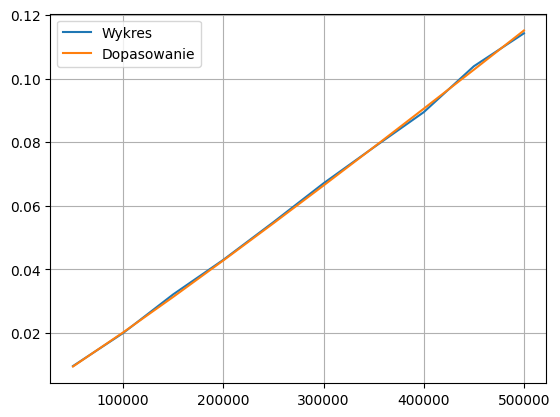

In [4]:
def sredniCzasWykonaiaSorted(dlugosc):
    czasSredni = 0
    for i in range(100):
        lista = [random.randint(-1000, 1000) for _ in range(dlugosc)]
        start = time.time()
        sorted(lista)
        end = time.time()
        czasSredni += end - start
    czasSredni /= 100
    return czasSredni


def test(x, a):
    return a*x*np.log(x)


timeList = []  # lista czasów wykonania sorted od coraz dłuższych list
numberOfTests = 10  # liczba iteracji pętli; liczba list
x = np.array([(i+1) * 50000 for i in range(numberOfTests)])
for i in range(numberOfTests):
    timeList.append(sredniCzasWykonaiaSorted((i+1) * 50000))  # średni czas sortowania takiej listy
    # dodajemy do listy czasów

param, param_cov = curve_fit(f=test, xdata=x, ydata=timeList)
ans = (param[0]*x*np.log(x))

plt.plot(x, timeList)
plt.plot(x, ans)
plt.legend(["Wykres", "Dopasowanie"])
plt.grid(True)
plt.show()